<font color="red" size="6">Filter Methods</font>
<p><font color="Yellow" size="4">2_Correlation Coefficient</font>

<b>The correlation coefficient measures the linear relationship between two variables. For feature selection, it helps identify:<b>

<li>Highly correlated features (multicollinearity): Remove redundant features.</li>
    <li>Weakly correlated features with the target variable: Drop irrelevant features.</li>

<b>Steps:</b>

<li>Compute the correlation matrix.</li>
    <li>Identify pairs of features with high correlation (e.g., |correlation| > 0.8).</li>
    <li>Select features with lower correlation or based on their relevance to the target.</li>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample dataset
data = {
    "Feature1": [1, 2, 3, 4, 5],
    "Feature2": [2, 4, 6, 8, 10],  # Perfectly correlated with Feature1
    "Feature3": [5, 4, 3, 2, 1],  # Negatively correlated with Feature1
    "Feature4": [1, 1, 1, 1, 1],  # Zero variance
    "Target": [1, 0, 1, 0, 1]     # Target variable
}
df = pd.DataFrame(data)
print("Original Dataset:")
print(df)




Original Dataset:
   Feature1  Feature2  Feature3  Feature4  Target
0         1         2         5         1       1
1         2         4         4         1       0
2         3         6         3         1       1
3         4         8         2         1       0
4         5        10         1         1       1


In [3]:
# Compute correlation matrix
correlation_matrix = df.corr()



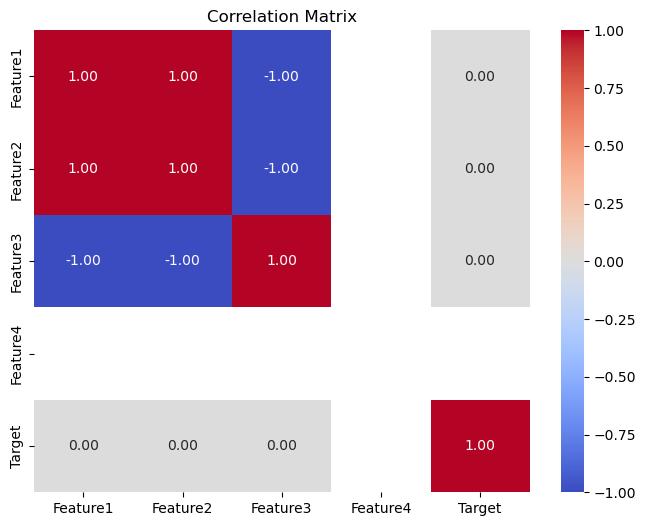

In [4]:
# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [5]:
# Identify highly correlated features (threshold = 0.8)
threshold = 0.8
corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Filter pairs with correlation above the threshold (exclude self-correlation)
high_corr_pairs = [(i, j) for i, j in corr_pairs.index if i != j and corr_pairs[i, j] > threshold]
print("\nHighly Correlated Pairs (|Correlation| > 0.8):", high_corr_pairs)


Highly Correlated Pairs (|Correlation| > 0.8): [('Feature1', 'Feature2'), ('Feature1', 'Feature3'), ('Feature2', 'Feature1'), ('Feature2', 'Feature3'), ('Feature3', 'Feature1'), ('Feature3', 'Feature2')]


Removing Redundant Features

In [6]:
# Drop one feature from each pair of highly correlated features
features_to_drop = {pair[1] for pair in high_corr_pairs}
df_reduced = df.drop(columns=features_to_drop)
print("\nReduced Dataset:")
print(df_reduced)


Reduced Dataset:
   Feature4  Target
0         1       1
1         1       0
2         1       1
3         1       0
4         1       1


<b><font color="red">Correlation with Target Variable:</font>

To select features relevant to the target, consider their correlation with the target variable.

In [12]:
# Compute correlation with the target variable
target_correlation = correlation_matrix["Target"].drop("Target")
print("\nCorrelation with Target Variable:")
print(target_correlation)
# Select features with significant correlation (e.g., |correlation| > 0.2)
selected_features = target_correlation[abs(target_correlation) > 0.2].index.tolist()
print("\nSelected Features Based on Target Correlation:", selected_features)



Correlation with Target Variable:
Feature1    0.0
Feature2    0.0
Feature3    0.0
Feature4    NaN
Name: Target, dtype: float64

Selected Features Based on Target Correlation: []


<b><font color="red">Key Points:</font></b>

<font color="green">Threshold Selection:</font>
        <li>Use a correlation threshold (e.g., 0.8) to identify highly correlated features.</li>
        <li>Use domain knowledge and downstream model requirements when deciding which features to drop.</li>

<font color="green">Correlation with Target:</font>
        <li>Select features significantly correlated with the target to improve model performance.</li>
        <li>Be cautious of nonlinear relationships—use other techniques (e.g., mutual information) for non-linear dependencies.</li>